*************MUSIC RECOMMENDATION SYSTEM ***********

# created by:
## 1)AMIT KUMAR YADAV
## 2)MD ZEESHAN ARIF
## 3)JAIMIN MAKWANA
## 4)MANAN PAREEK
## 5)MEHUL KHANDALWAL

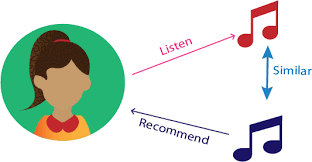

###### By using music recommender system, the music provider can predict and then offer the appropriate songs to their users based on the characteristics of the music that has been heard previously.

## importing all the necessary libraries: 

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the datasets:

In [6]:
df=pd.read_csv("/content/drive/MyDrive/kaggle/kaggle_visible_evaluation_triplets.txt",sep='\t',names=["user_id",'song_id','freq'])

In [7]:
# checked the heads of the 

df.head(5)   

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [8]:
df.shape

(1450933, 3)

In [9]:
# checked the description of the data

df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [10]:
# description of categorical column 
df.describe(include="object")

,user_id,song_id
count,1450933,1450933
unique,110000,163206
top,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOFRQTD12A81C233C0
freq,53,5043


In [11]:
unique=pd.read_csv("/content/drive/MyDrive/kaggle/unique_tracks.txt",sep='<SEP>',
                   names=["track_id","song_id","artist_name","release"])

In [12]:
unique.head(5)

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [13]:
unique.shape

(1000000, 4)

## EXPLORATORY DATA ANALYSIS (EDA):

# Checking missing and duplicates values

In [14]:
missing_valuse=df.isnull().sum()
print(missing_valuse)

user_id    0
song_id    0
freq       0
dtype: int64


In [15]:
missing_valuse1=unique.isnull().sum()
print(missing_valuse1)

track_id        0
song_id         0
artist_name     0
release        15
dtype: int64


In [16]:
# observations:

# 1) there is no null values present in triplets data
# 2) 15 null values are present in unique datas

In [17]:
# dropping the nan values from unique datas
unique.dropna(how='any',inplace=True)

In [18]:
unique.isnull().sum()

track_id       0
song_id        0
artist_name    0
release        0
dtype: int64

In [19]:
# after dropping the null values , the shape of the dataframe is :
unique.shape

(999985, 4)

In [20]:
duplicated=df.duplicated()
print(sum(duplicated))

0


In [21]:
duplicated_unique=unique.duplicated()
print(sum(duplicated_unique))

0


In [22]:
duplicated=unique['song_id'].duplicated()
print(sum(duplicated))

944


In [23]:
# DROPPING THE DUPLICATES ITEMS FROM SONG_ID

unique.drop_duplicates(subset='song_id',keep='first',inplace=True)

In [24]:
duplicated=unique['song_id'].duplicated()
print(sum(duplicated))

0


# Merging the dataframes

In [25]:
final_data=pd.merge(df,unique,how='left',on='song_id')

In [26]:
final_data.head(5)

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [27]:
final_data['freq'].unique()

array([  1,   2,  15,   4,   3,  14,  10,   6,  54,   5,  11,   8,   9,
         7,  13,  38,  16,  31,  24,  12,  18,  17,  20,  23,  43,  62,
        26,  42,  25,  37,  29,  89,  79,  19,  59,  21,  27,  33,  36,
        28,  65,  53,  30,  22,  73,  70,  40,  46, 125,  48, 150,  34,
       241, 214,  32,  75,  72,  76,  57,  52,  55,  63,  58,  82,  49,
        35,  39,  56,  50, 126,  86,  71,  47, 113,  60, 118,  61,  45,
       106,  41,  69, 281, 130, 384, 163, 111, 123,  44, 107, 180, 162,
       188,  80, 155,  78,  68, 290, 191,  84, 173, 212, 213, 244, 102,
        88, 103,  66,  64,  51, 101, 166, 181,  96, 201, 220,  94,  90,
        81,  85, 112,  87,  91, 194, 124,  99, 122, 114,  74,  95,  98,
        92, 144, 139, 116,  77, 105, 145, 355, 104, 140,  67, 245, 117,
       110, 203, 196, 108, 256, 195, 354, 132, 226, 450, 128, 270, 100,
        93, 261, 133, 148, 119, 175, 146,  83, 259, 151, 478, 161, 202,
       221, 345, 164, 127, 138, 240, 230, 129, 109, 136, 207, 19

In [28]:
final_data.shape

(1450933, 6)

In [29]:
# CHECKING THE NULL VALUES:

final_data.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       1
artist_name    1
release        1
dtype: int64

In [30]:
final_data.dropna(how='any',inplace=True)     # DROPPING THE NULL VALUES

In [31]:
final_data.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       0
artist_name    0
release        0
dtype: int64

In [32]:
final_data.shape

(1450932, 6)

# Basic statistics And Observations :

In [33]:
print('Total number of data points:',final_data.shape[0])
print("Total number of user:",final_data["user_id"].unique().shape[0])
print("Total number of songs:",final_data["song_id"].unique().shape[0])
print("Total number of track:",final_data["track_id"].unique().shape[0])

Total number of data points: 1450932
Total number of user: 110000
Total number of songs: 163205
Total number of track: 163205


In [34]:
print("Number of unique release",final_data["release"].unique().shape[0])
print("Number of unique Artist",final_data["artist_name"].unique().shape[0])


Number of unique release 137622
Number of unique Artist 28360


In [35]:
# DESCRIPTION OF NUMERICAL DATA

final_data.describe()

,freq
count,1.450932e+06
mean,3.187151e+00
std,7.051666e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [36]:
# DESCRIPTION OF CATEGORICAL DATA:

final_data.describe(include="object")

,user_id,song_id,track_id,artist_name,release
count,1450932,1450932,1450932,1450932,1450932
unique,110000,163205,163205,28360,137622
top,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOFRQTD12A81C233C0,TRDMBIJ128F4290431,Coldplay,Sehr kosmisch
freq,53,5043,5043,12279,5043


# Distribution of frequency

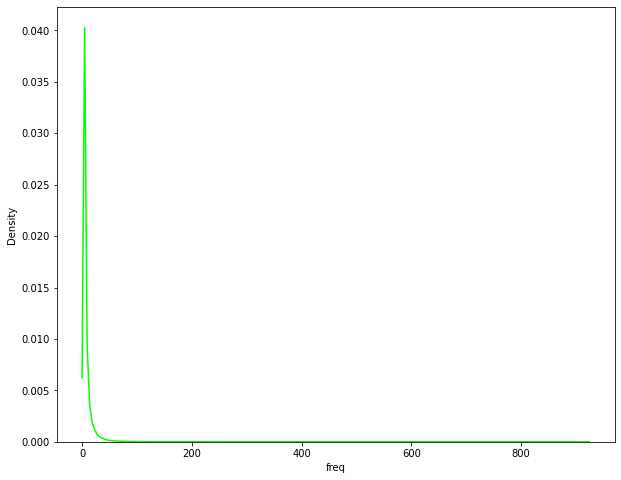

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(final_data['freq'],hist=False,color='lime')
plt.show()

In [38]:
# THE ABOVE DISTRIBUTIONS SHOWS THAT THE SONGS WHICH WAS HEARD MOST NUMBER OF TIME HAS THE FREQUENCY VALUES BETWEEN 1 T0 50 ALMOST

# frequency of each song

In [39]:
song_counts=final_data.groupby(["song_id"]).agg({"freq":"count"}).reset_index()

In [40]:
song_counts.head()

,song_id,freq
0,SOAAAFI12A6D4F9C66,2
1,SOAAAGK12AB0189572,1
2,SOAAAGQ12A8C1420C8,33
3,SOAAAMT12AB018C9C4,1
4,SOAAAQN12AB01856D3,2


In [41]:
# SORTING THE FREQUENCY OF SONG_ID IN DESCINDING ORDER:

song_counts.sort_values(by="freq",ascending=False).head()

,song_id,freq
38185,SOFRQTD12A81C233C0,5043
5478,SOAUWYT12A81C206F1,4483
10546,SOBONKR12A58A7A7E0,4136
6096,SOAXGDH12A8C13F8A1,3780
121599,SOSXLTC12AF72A7F54,3672


## number of songs listened per user

In [42]:
user_count=final_data.groupby(["user_id"]).agg({"freq":"count"}).reset_index()

In [43]:
user_count.head()

,user_id,freq
0,00007a02388c208ea7176479f6ae06f8224355b3,9
1,00014a76ed063e1a749171a253bca9d9a0ff1782,11
2,00015189668691680bb1a2e58afde1541ec92ced,17
3,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
4,00020fcd8b01986a6a85b896ccde6c49f35142ad,32


In [44]:
# SORTING THE USER_ID WITH FREQUENCY IN DESCINDING ORDER
user_count.sort_values(by="freq",ascending=False).head()

,user_id,freq
53921,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
90678,d30e18323f15426c3cdc8585252ed34459916f51,52
1597,03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
19962,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52


## popularity of artist as per frequency:

In [45]:
artist_popularity=final_data.groupby(["artist_name"]).agg({"freq":"count"}).reset_index()

In [46]:
artist_popularity.tail()

,artist_name,freq
28355,Étienne Daho,45
28356,Íon,5
28357,Ólafur Arnalds,78
28358,Órla Fallon,1
28359,Özlem Tekin,1


In [47]:
# SORTING THE ARTIST NAME BASED ON POPULARITY AND WHO IS HAVING HIGHEST FREQUENCY:

artist_popularity.sort_values(by="freq",ascending=False).head()

,artist_name,freq
5085,Coldplay,12279
13610,Kings Of Leon,8514
8801,Florence + The Machine,8213
12964,Justin Bieber,7669
11378,Jack Johnson,6784


OBSERVATIONS OF ARTIST NAME:


In [48]:
# 1) COLD PLAY LEADING IN THE ARTIST NAME HAVING HIGHEST FREQUENCY
#2) KINGS OF LEON HAS THE SECOND HIGHEST FREQUENCY

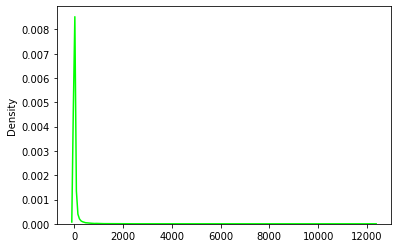

In [49]:
sns.distplot(artist_popularity["freq"].values,x=None,hist=False,color="lime")
plt.show()

In [50]:
# UNIQUE RELEASES OF ARTIST NAME " COLDPLAY

final_data["release"][final_data["artist_name"]=="Coldplay"].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [51]:
# UNIQUE RELEASES OF ARTIST NAME "KINGS OF LEON"

final_data["release"][final_data["artist_name"]=="Kings Of Leon"].unique()

array(['Genius', 'Revelry', 'Use Somebody', 'Knocked Up', 'Closer',
       "Molly's Chambers", 'Ragoo', 'Dusty', 'Manhattan', 'Camaro',
       'I Want You', 'Cold Desert', 'Holy Roller Novocaine', 'Arizona',
       'McFearless', 'Be Somebody', 'Day Old Blues', 'Rememo',
       'Happy Alone', 'King Of The Rodeo', 'Milk', 'Pistol Of Fire',
       'The Runner', 'Velvet Snow', "Joe's Head", 'Charmer',
       'California Waiting', 'Trunk', 'Trani', 'Where Nobody Knows',
       'Fans', 'Slow Night_ So Long', 'Soft', 'Razz', 'Taper Jean Girl',
       'Black Thumbnail', 'Beneath The Surface', 'Frontier City',
       'Four Kicks'], dtype=object)

## popularity based recommendation system...

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

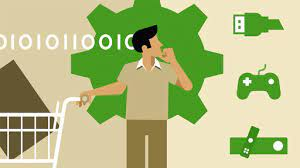


# kya choose kiya jaye?

### creating a popularity based recommendation  function:

In [170]:
def create_popularity_recommendation(train_data, user_id, release, n=10):
    #Get a count of user_ids for each unique song as recommendation score
    train_data_grouped = final_data.groupby(["release"]).agg({"user_id": 'count'}).reset_index()
    train_data_grouped.rename(columns = {"user_id": 'score'},inplace=True)
    
    #Sort the songs based upon recommendation score
    train_data_sort = train_data_grouped.sort_values(['score', "release"], ascending = [0,1])
    
    #Generate a recommendation rank based upon score
    train_data_sort['Rank'] = train_data_sort.score.rank(ascending=0, method='first')
        
    #Get the top n recommendations
    popularity_recommendations = train_data_sort.head(n)
    return popularity_recommendations

# recommending top 10 releases to a new user:

In [171]:
recommendations = create_popularity_recommendation(final_data,'user_id','release', 10)
display(recommendations)

,release,score,Rank
98812,Sehr kosmisch,5043,1.0
125393,Undo,4483,2.0
136066,You're The One,4270,3.0
28716,Dog Days Are Over (Radio Edit),3780,4.0
93984,Revelry,3672,5.0
98585,Secrets,3456,6.0
49061,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,7.0
47683,Hey_ Soul Sister,2791,8.0
37656,Fireflies,2745,9.0
121358,Tive Sim,2669,10.0


## Recommending top 10 artist name to a new user:

In [173]:
def create_popularity_recommendation(train_data, user_id, artist_name, n=10):
  train_data_grouped = final_data.groupby(["artist_name"]).agg({"user_id": 'count'}).reset_index()
  train_data_grouped.rename(columns = {"user_id": 'score'},inplace=True)
    
    #Sort the songs based upon recommendation score
  train_data_sort = train_data_grouped.sort_values(['score', "artist_name"], ascending = [0,1])
    
    #Generate a recommendation rank based upon score
  train_data_sort['Rank'] = train_data_sort.score.rank(ascending=0, method='first')
        
    #Get the top n recommendations
  popularity_recommendations = train_data_sort.head(n)
  return popularity_recommendations


In [174]:
recommendations = create_popularity_recommendation(final_data,'user_id','artist_name', 10)
display(recommendations)

,artist_name,score,Rank
5085,Coldplay,12279,1.0
13610,Kings Of Leon,8514,2.0
8801,Florence + The Machine,8213,3.0
12964,Justin Bieber,7669,4.0
11378,Jack Johnson,6784,5.0
26440,Train,6617,6.0
23945,The Black Keys,6507,7.0
7969,Eminem,6297,8.0
18346,OneRepublic,6027,9.0
17317,Muse,5849,10.0


In [54]:
final_data.head(2)

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...


# content based recommendation...

### Recommendations done using content-based recommenders can be seen as a user-specific classification problem. This classifier learns the user's likes and dislikes from the features of the song.

### The most straightforward approach is keyword matching.

### In a few words, the idea behind is to extract meaningful keywords present in a song description a user likes, search for the keywords in other song descriptions to estimate similarities among them, and based on that, recommend those songs to the user.

### How is this performed?

### In our case, because we are working with text and words, Term Frequency-Inverse Document Frequency (TF-IDF) can be used for this matching process.

# We'll go through the steps for generating a content-based music recommender system.

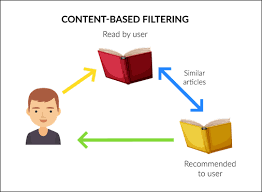

In [55]:
# separating release (song)  from our final data sets to find the similarity between songs:
songs=pd.DataFrame(final_data['release'])
songs.head(5)

,release
0,You're The One
1,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,Tive Sim
3,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,El Cuatrero


In [119]:
# taking 10000 samples from the original datasets, to reduce the time complexity, bcz it will take much time to find the similarity score between lakhs of songs

songs2=songs.sample(n=10000).reset_index(drop=True)

In [120]:
songs2.head()    # checking top 5 head of 10000 samples:

,release
0,Slam
1,Underdog In The Style of You Me At Six No...
2,Until We Bleed Feat Lykke Li
3,Somewhere in the Middle
4,Faster Explicit Version


In [122]:
# in the songs column we are replacing numbers and extra character by using replace function
songs2['release']=songs2['release'].str.replace(r'[^a-z A-Z]',' ')

In [123]:
songs2.head()   

,release
0,Slam
1,Underdog In The Style of You Me At Six No...
2,Until We Bleed Feat Lykke Li
3,Somewhere in the Middle
4,Faster Explicit Version


In [124]:
#importing tfid and cosine_similarity 
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [183]:
tfidf=TfidfVectorizer(analyzer='word',stop_words='english')

In [184]:
lyric_matrix=tfidf.fit_transform(songs2['release'])

In [127]:
cosine_similarities=cosine_similarity(lyric_matrix)  # cosine similarity caLCULATION BETWEEN DIFFERENT songs

In [128]:
cos=pd.DataFrame(cosine_similarities)

In [129]:
similarities={}


In [130]:
for i in range(len(cosine_similarities)):
  similar_indices=cosine_similarities[i].argsort()[:-50:-1]
  similarities[songs["release"].iloc[i]]=[(cosine_similarities[i][x],songs2["release"][x],songs2["release"][x]) for x in similar_indices][1:]

## creating content based recommendor:

In [131]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, recommendation):
        # Get song to find recommendations for
        song = recommendation['song']
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        # print each item
        self._print_message(song=song, recom_song=recom_song)

In [132]:

recommedations = ContentBasedRecommender(similarities)

In [151]:
# recommending songs by passing one songs to our recommender function:

recommendation = {
    "song": songs2['release'].iloc[50],
    "number_songs": 10
}

In [152]:
recommedations.recommend(recommendation)

The 10 recommended songs for Sehr kosmisch are:
Number 1:
Take A Bow by Take A Bow with 1.0 similarity score
--------------------
Number 2:
Take A Bow by Take A Bow with 1.0 similarity score
--------------------
Number 3:
Take A Bow by Take A Bow with 1.0 similarity score
--------------------
Number 4:
Take A Bow by Take A Bow with 1.0 similarity score
--------------------
Number 5:
Refuse To Bow Down by Refuse To Bow Down with 0.684 similarity score
--------------------
Number 6:
Kelma by Kelma with 0.0 similarity score
--------------------
Number 7:
Jingle Bell Rock by Jingle Bell Rock with 0.0 similarity score
--------------------
Number 8:
CIE  by CIE  with 0.0 similarity score
--------------------
Number 9:
She s Got A Way by She s Got A Way with 0.0 similarity score
--------------------
Number 10:
Nimrod s Son by Nimrod s Son with 0.0 similarity score
--------------------


In [155]:
recommendation2 = {
    "song": songs2['release'].iloc[100],
    "number_songs": 10
}

In [156]:
recommedations.recommend(recommendation2)

The 10 recommended songs for Timeless are:
Number 1:
Happy Birthday by Happy Birthday with 0.769 similarity score
--------------------
Number 2:
Birthday Sex by Birthday Sex with 0.713 similarity score
--------------------
Number 3:
Birthday Sex by Birthday Sex with 0.713 similarity score
--------------------
Number 4:
Birthday Sex by Birthday Sex with 0.713 similarity score
--------------------
Number 5:
Happy Birthday  Live Verison  by Happy Birthday  Live Verison  with 0.552 similarity score
--------------------
Number 6:
CIE  by CIE  with 0.0 similarity score
--------------------
Number 7:
Secrets by Secrets with 0.0 similarity score
--------------------
Number 8:
Midnight by Midnight with 0.0 similarity score
--------------------
Number 9:
Mouth To Mouth by Mouth To Mouth with 0.0 similarity score
--------------------
Number 10:
My Soft  Deep by My Soft  Deep with 0.0 similarity score
--------------------
